In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk 

In [2]:
df= pd.read_csv('Reviews.csv')

In [3]:
df.head()
print(df.shape)
df = df.head(500)
df.shape

(568454, 10)


(500, 10)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Quick EDA

<Axes: title={'center': 'Count of reviews by Star'}, xlabel='Reviews Star'>

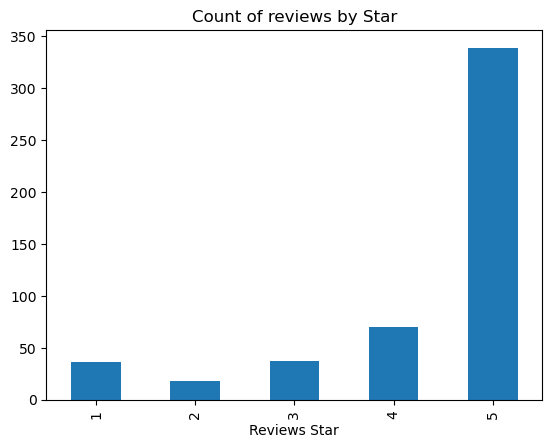

In [5]:
df['Score'].value_counts().sort_index().\
plot(kind='bar', title='Count of reviews by Star',xlabel='Reviews Star')

## basic nltk stuff

In [6]:
example = df['Text'][70]

In [7]:
print(example)



These Albanese gummi bears and rings and so on are very good and tasty and high quality. The bears even have little faces. At my local candy store this type of gummi stuff (bears, rings, snakes, balls, worms, whatever) are about $10/lb. These twin packs of 4.5 or 5 pound bags is a screaming deal as far as I'm concerned. I'm probably 50 pounds deep in these friggin' things. Consumed!


In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['These',
 'Albanese',
 'gummi',
 'bears',
 'and',
 'rings',
 'and',
 'so',
 'on',
 'are']

In [9]:
tagged=nltk.pos_tag(tokens)
tagged[:10]

[('These', 'DT'),
 ('Albanese', 'JJ'),
 ('gummi', 'NN'),
 ('bears', 'NNS'),
 ('and', 'CC'),
 ('rings', 'NNS'),
 ('and', 'CC'),
 ('so', 'RB'),
 ('on', 'IN'),
 ('are', 'VBP')]

In [10]:
entities = nltk.chunk.ne_chunk(tagged)

In [11]:
entities.pprint()

(S
  These/DT
  Albanese/JJ
  gummi/NN
  bears/NNS
  and/CC
  rings/NNS
  and/CC
  so/RB
  on/IN
  are/VBP
  very/RB
  good/JJ
  and/CC
  tasty/JJ
  and/CC
  high/JJ
  quality/NN
  ./.
  The/DT
  bears/NNS
  even/RB
  have/VBP
  little/JJ
  faces/VBZ
  ./.
  At/IN
  my/PRP$
  local/JJ
  candy/NN
  store/NN
  this/DT
  type/NN
  of/IN
  gummi/NN
  stuff/NN
  (/(
  bears/NNS
  ,/,
  rings/NNS
  ,/,
  snakes/NNS
  ,/,
  balls/NNS
  ,/,
  worms/NNS
  ,/,
  whatever/WDT
  )/)
  are/VBP
  about/IN
  $/$
  10/lb/CD
  ./.
  These/DT
  twin/JJ
  packs/NNS
  of/IN
  4.5/CD
  or/CC
  5/CD
  pound/NN
  bags/NNS
  is/VBZ
  a/DT
  screaming/VBG
  deal/NN
  as/RB
  far/RB
  as/IN
  I/PRP
  'm/VBP
  concerned/JJ
  ./.
  I/PRP
  'm/VBP
  probably/RB
  50/CD
  pounds/NNS
  deep/JJ
  in/IN
  these/DT
  friggin/NN
  '/''
  things/NNS
  ./.
  Consumed/VBN
  !/.)


## Vader (Valence Aware Dictionary and sEntiment Reasoner - Bag of word approach

### 1- The stop words are removed.
### 2- Each word is scored and combined with the total score.


In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores("I am so sad")

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [14]:
sia.polarity_scores("I am so fuckin happy")

{'neg': 0.0, 'neu': 0.43, 'pos': 0.57, 'compound': 0.6096}

In [15]:
sia.polarity_scores(example)

{'neg': 0.036, 'neu': 0.916, 'pos': 0.048, 'compound': 0.2228}

In [16]:
#Running polarity score on whole dataset
res = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
    text = row["Text"]
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [17]:
vader = pd.DataFrame(res).T
vader = vader.reset_index().rename(columns={'index':'Id'})
vader = vader. merge(df, how ='left')


In [18]:
#Now we have sentiment score and meta data

vader.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [19]:
## Plot vader results

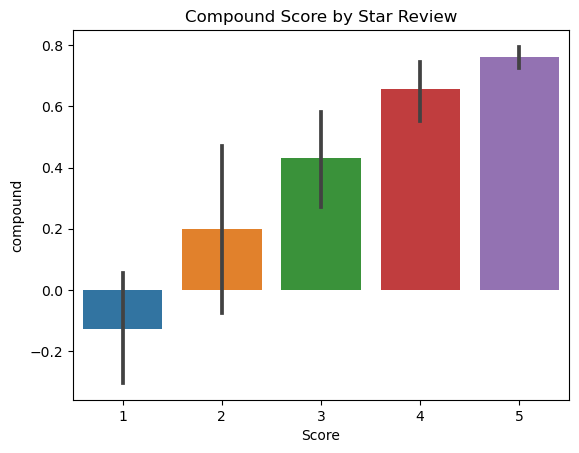

In [20]:
bar = sns. barplot(data = vader, x='Score', y = 'compound')
bar.set_title('Compound Score by Star Review')
plt.show()

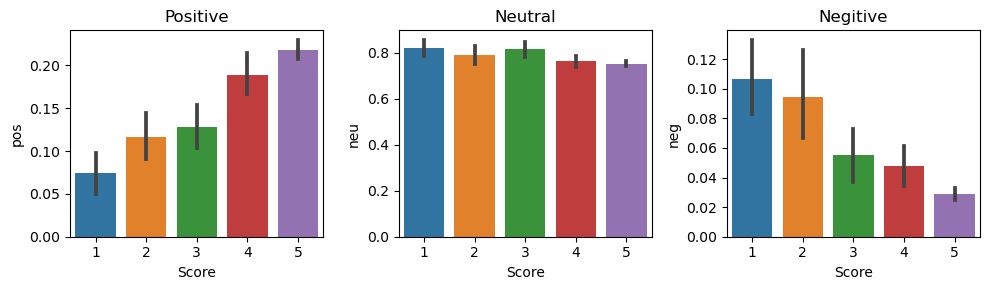

In [21]:
fig, axs = plt.subplots(1,3, figsize=(10,3))
sns.barplot(data = vader, x= 'Score', y = 'pos', ax = axs[0])
sns.barplot(data = vader, x= 'Score', y = 'neu', ax = axs[1])
sns.barplot(data = vader, x= 'Score', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negitive')
plt.tight_layout()
plt.show()

## Roberta Pre trained Model

#### Use a model pre trained on a large amount of data 
#### Transform model for accounts for the words but also the context related to other words.

In [22]:
from transformers import AutoTokenizer
from transformers import  AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [24]:
# Vader result on example
sia.polarity_scores(example)

{'neg': 0.036, 'neu': 0.916, 'pos': 0.048, 'compound': 0.2228}

In [25]:
# Roberta model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
    
}
print(scores_dict)

{'roberta_neg': 0.03223974, 'roberta_neu': 0.13916062, 'roberta_pos': 0.8285997}


In [26]:
def polarity_Scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]

    }
    return scores_dict

In [27]:
#Running polarity score on whole dataset
res = {}
for i,row in tqdm(df.iterrows(), total = len(df)):
    try :
        text = row["Text"]
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value  
        roberta_result = polarity_Scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f"Broke for id {myid}")
        

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [28]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.678,
 'vader_pos': 0.322,
 'vader_compound': 0.9811,
 'roberta_neg': 0.0024397527,
 'roberta_neu': 0.0113272,
 'roberta_pos': 0.986233}

In [29]:
roberta_result

{'roberta_neg': 0.0024397527,
 'roberta_neu': 0.0113272,
 'roberta_pos': 0.986233}

In [30]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index':'Id'})
result_df = result_df. merge(df, how ='left')


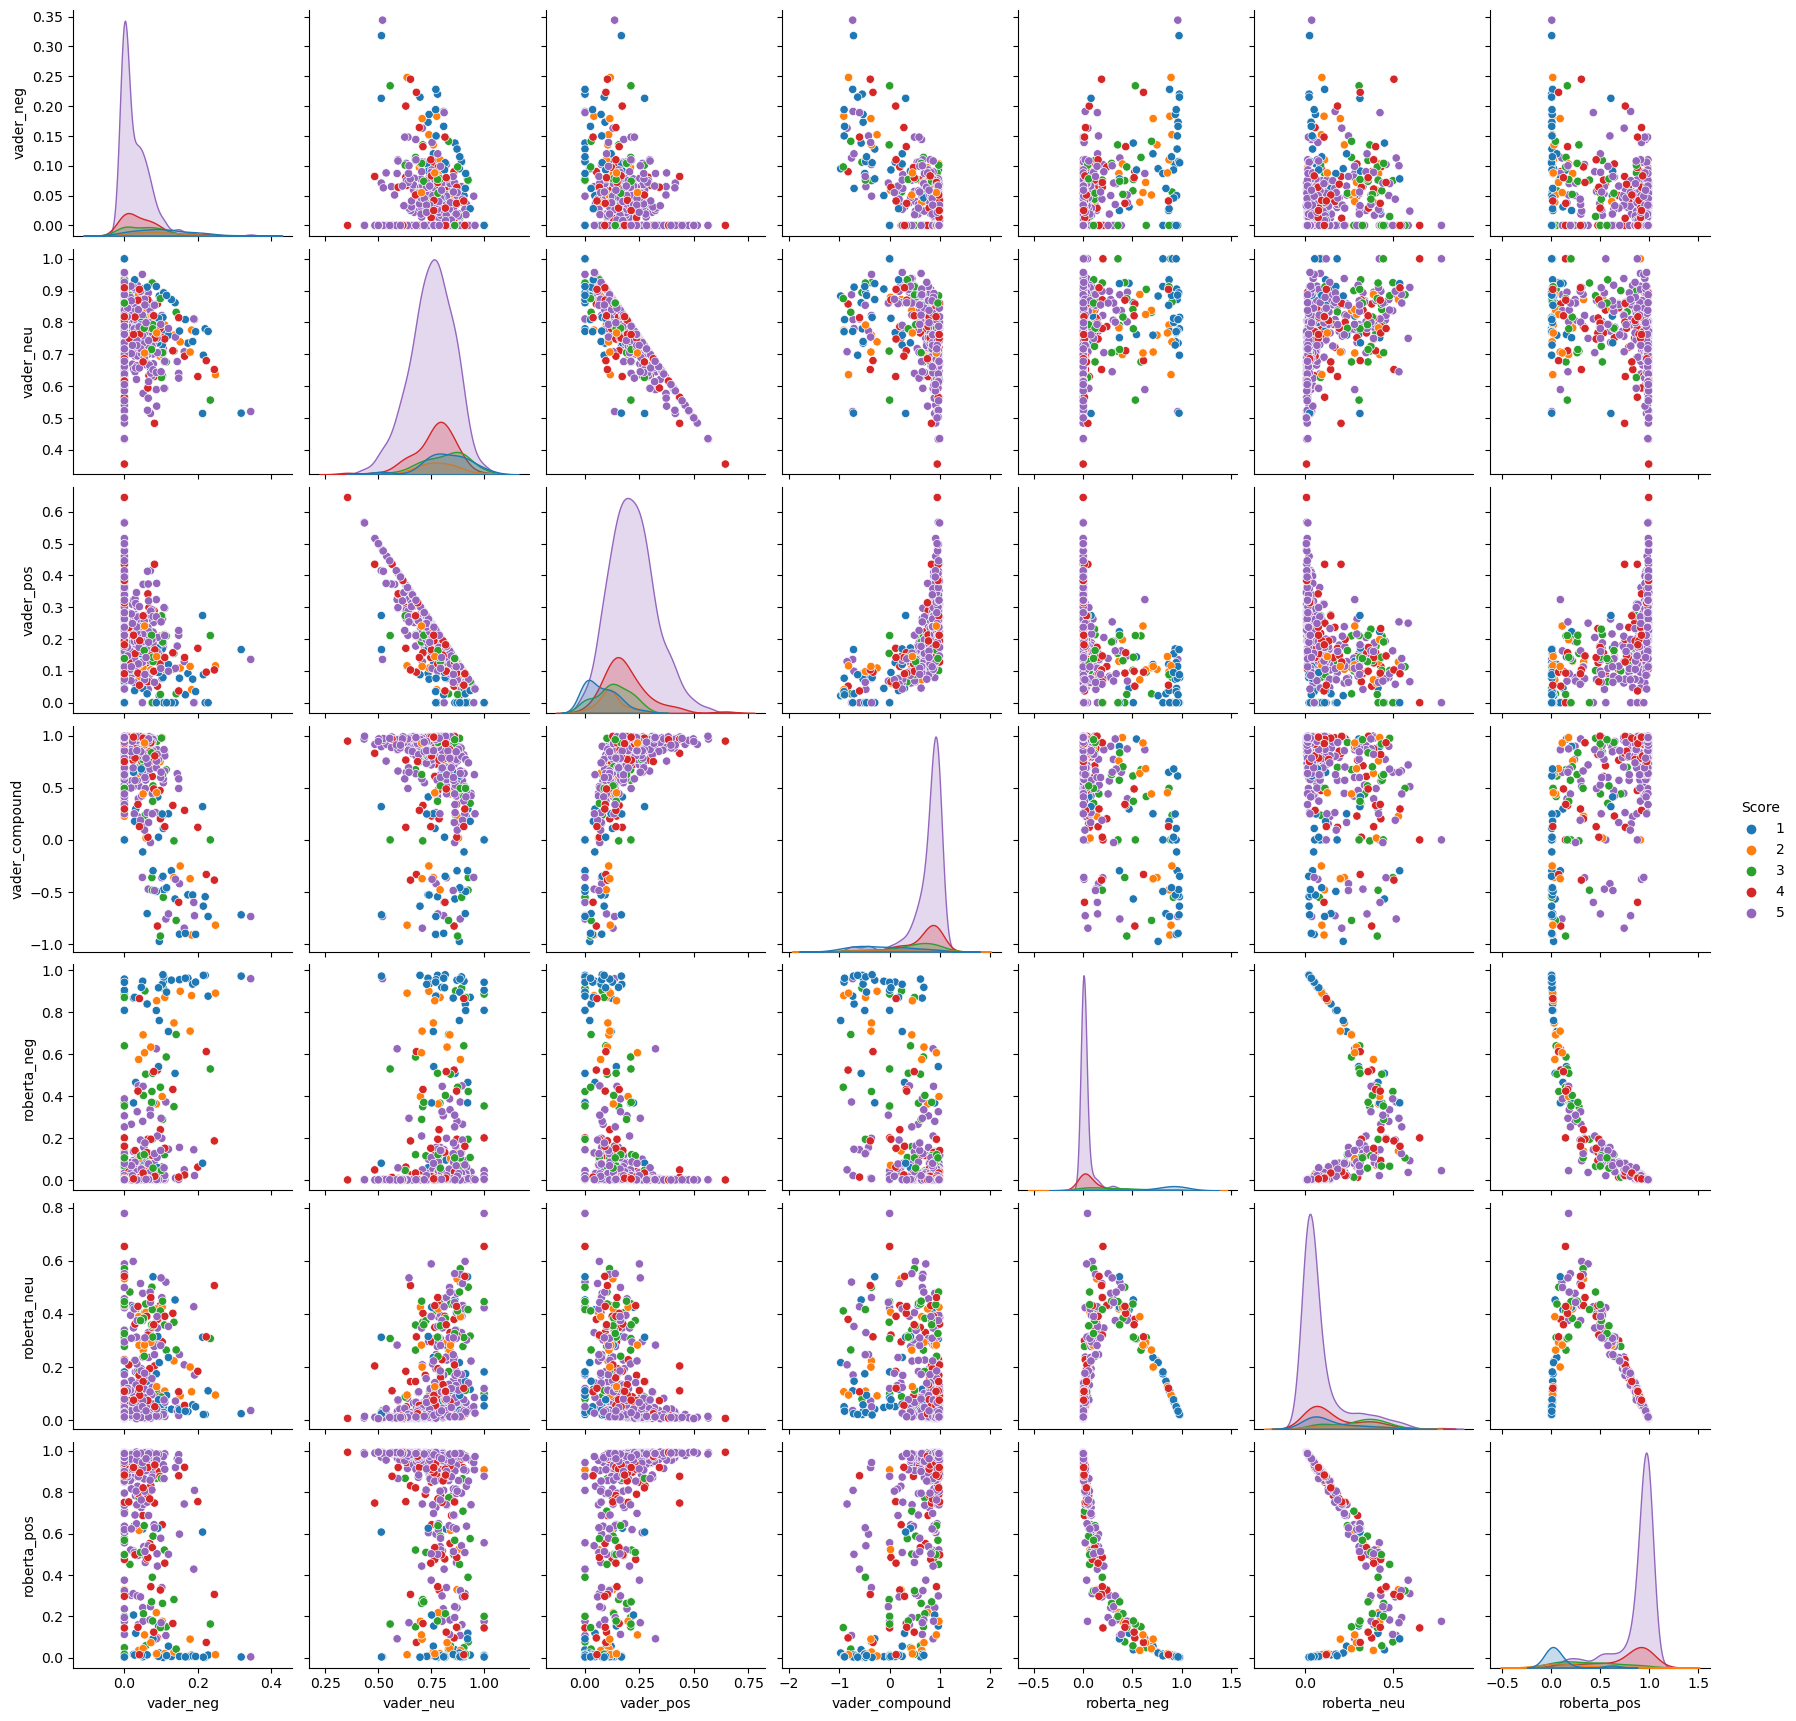

In [31]:
sns.pairplot(data = result_df, vars = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], hue ='Score', palette = 'tab10')
plt.show()

In [32]:
result_df.query('Score == 1')\
.sort_values('roberta_pos', ascending = False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [33]:
result_df.query('Score == 1')\
.sort_values('vader_pos', ascending = False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [34]:
result_df.query('Score == 5')\
.sort_values('roberta_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [35]:
result_df.query('Score == 5')\
.sort_values('vader_neg', ascending = False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [36]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [37]:
sent_pipeline('I love sentiment analysis')

[{'label': 'POSITIVE', 'score': 0.999736487865448}]

In [38]:
sent_pipeline(example)

[{'label': 'NEGATIVE', 'score': 0.5278947353363037}]

In [ ]:
ress = {}
for i,row in df.iterrows():
    text = row["Text"]
    myid = row['Id']
    ress[myid] = sent_pipeline(text, truncation = True)